In [1]:
#importing Libraries :)

import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten,Input, Activation, Layer, Lambda
from keras.models import Sequential, Model
from keras import regularizers
from keras.callbacks import History 
history = History()

import matplotlib.pyplot as plt

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
#load dataset

dataset=pd.read_csv("covtype.csv")

In [3]:
dataset.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
dataset.shape

(581012, 55)

In [5]:
#check for null values
dataset.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


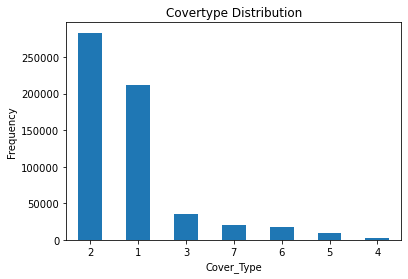

In [6]:
count_classes = pd.value_counts(dataset['Cover_Type'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Covertype Distribution")
plt.xlabel("Cover_Type")
plt.ylabel("Frequency")
plt.savefig("Covertype Distribution")
plt.show()

In [7]:
y = dataset.iloc[:,-1].values
x = dataset.drop(["Cover_Type"],axis=1)
x.shape,y.shape

((581012, 54), (581012,))

In [8]:
cov1 = dataset[dataset['Cover_Type']==1]
cov2 = dataset[dataset['Cover_Type']==2]
cov3 = dataset[dataset['Cover_Type']==3]
cov4 = dataset[dataset['Cover_Type']==4]
cov5 = dataset[dataset['Cover_Type']==5]
cov6 = dataset[dataset['Cover_Type']==6]
cov7 = dataset[dataset['Cover_Type']==7]
print(cov1.shape,cov2.shape,cov3.shape,cov4.shape,cov5.shape,cov6.shape,cov7.shape)

(211840, 55) (283301, 55) (35754, 55) (2747, 55) (9493, 55) (17367, 55) (20510, 55)


In [9]:
# Implementing Undersampling for Handling Imbalanced 
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_res,y_res=nm.fit_sample(x,y)

In [10]:
X_res.shape,y_res.shape

((19229, 54), (19229,))

In [11]:
X_res

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2466,354,20,0,0,807,182,201,153,1463,...,0,0,1,0,0,0,0,0,0,0
1,2531,23,9,42,0,735,215,221,142,890,...,0,0,0,0,0,0,0,0,0,0
2,2533,36,4,30,0,750,220,230,147,860,...,0,0,0,0,0,0,0,0,0,0
3,2530,20,6,30,-3,742,216,228,149,875,...,0,0,0,0,0,0,0,0,0,0
4,2470,309,10,0,0,828,193,234,181,1455,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,3290,334,22,277,64,1905,163,204,177,467,...,0,0,0,0,0,0,0,0,1,0
19225,3284,47,24,808,188,1253,220,182,84,1816,...,0,0,0,0,0,0,0,0,0,1
19226,3412,328,38,277,152,1054,103,166,186,1577,...,0,0,0,0,0,0,0,0,1,0
19227,3271,286,12,342,113,930,186,240,194,2255,...,0,0,0,0,0,0,0,0,1,0


In [12]:
X_res.to_numpy()

array([[2466,  354,   20, ...,    0,    0,    0],
       [2531,   23,    9, ...,    0,    0,    0],
       [2533,   36,    4, ...,    0,    0,    0],
       ...,
       [3412,  328,   38, ...,    0,    1,    0],
       [3271,  286,   12, ...,    0,    1,    0],
       [3395,   34,   10, ...,    0,    0,    1]], dtype=int64)

In [13]:
X_res.shape

(19229, 54)

In [14]:
#Feature Scaling
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_res)

In [15]:
#spliting the dataset into train and test set

x_train,x_test,y_train,y_test= train_test_split(x_scaled,y_res,test_size = 0.1, random_state = 0)
x_train,x_val,y_train,y_val= train_test_split(x_train,y_train,test_size = 0.2, random_state = 0)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(13844, 54)
(1923, 54)
(3462, 54)


In [29]:
input_data = Input(shape=(54,))
encoded = Dense(54, activation='relu',activity_regularizer = regularizers.l1(1e-6))(input_data)
encoded = Dense(3, activation='relu')(encoded)
decoded = Dense(54, activation='sigmoid')(encoded)

In [30]:
autoencoder = Model(input_data, decoded)
autoencoder.compile(loss="mse",optimizer='Adam')
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 54)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 54)                2970      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 165       
_________________________________________________________________
dense_6 (Dense)              (None, 54)                216       
Total params: 3,351
Trainable params: 3,351
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = autoencoder.fit(x_train, x_train,
                epochs=400,
                batch_size=512,
                shuffle=True,
                validation_data=(x_val, x_val))

Train on 13844 samples, validate on 3462 samples
Epoch 1/400
13844/13844 [==============================] - 0s 12us/step - loss: 0.2169 - val_loss: 0.2113
Epoch 2/400
13844/13844 [==============================] - 0s 5us/step - loss: 0.2045 - val_loss: 0.1947
Epoch 3/400
13844/13844 [==============================] - 0s 5us/step - loss: 0.1806 - val_loss: 0.1618
Epoch 4/400
13844/13844 [==============================] - 0s 6us/step - loss: 0.1427 - val_loss: 0.1219
Epoch 5/400
13844/13844 [==============================] - 0s 6us/step - loss: 0.1061 - val_loss: 0.0900
Epoch 6/400
13844/13844 [==============================] - 0s 6us/step - loss: 0.0790 - val_loss: 0.0683
Epoch 7/400
13844/13844 [==============================] - 0s 6us/step - loss: 0.0619 - val_loss: 0.0562
Epoch 8/400
13844/13844 [==============================] - 0s 6us/step - loss: 0.0535 - val_loss: 0.0510
Epoch 9/400
13844/13844 [==============================] - 0s 6us/step - loss: 0.0498 - val_loss: 0.0484
Epoch

Epoch 78/400
13844/13844 [==============================] - 0s 7us/step - loss: 0.0183 - val_loss: 0.0184
Epoch 79/400
13844/13844 [==============================] - 0s 6us/step - loss: 0.0182 - val_loss: 0.0183
Epoch 80/400
13844/13844 [==============================] - 0s 5us/step - loss: 0.0182 - val_loss: 0.0183
Epoch 81/400
13844/13844 [==============================] - 0s 5us/step - loss: 0.0182 - val_loss: 0.0183
Epoch 82/400
13844/13844 [==============================] - 0s 5us/step - loss: 0.0181 - val_loss: 0.0182
Epoch 83/400
13844/13844 [==============================] - 0s 5us/step - loss: 0.0181 - val_loss: 0.0182
Epoch 84/400
13844/13844 [==============================] - 0s 5us/step - loss: 0.0180 - val_loss: 0.0181
Epoch 85/400
13844/13844 [==============================] - 0s 5us/step - loss: 0.0180 - val_loss: 0.0181
Epoch 86/400
13844/13844 [==============================] - 0s 5us/step - loss: 0.0179 - val_loss: 0.0181
Epoch 87/400
13844/13844 [====================

13844/13844 [==============================] - 0s 5us/step - loss: 0.0157 - val_loss: 0.0158
Epoch 155/400
13844/13844 [==============================] - 0s 6us/step - loss: 0.0157 - val_loss: 0.0157
Epoch 156/400
13844/13844 [==============================] - 0s 5us/step - loss: 0.0156 - val_loss: 0.0157
Epoch 157/400
13844/13844 [==============================] - 0s 5us/step - loss: 0.0156 - val_loss: 0.0157
Epoch 158/400
13844/13844 [==============================] - 0s 6us/step - loss: 0.0156 - val_loss: 0.0157
Epoch 159/400
13844/13844 [==============================] - 0s 6us/step - loss: 0.0156 - val_loss: 0.0156
Epoch 160/400
13844/13844 [==============================] - 0s 6us/step - loss: 0.0155 - val_loss: 0.0156
Epoch 161/400
13844/13844 [==============================] - 0s 6us/step - loss: 0.0155 - val_loss: 0.0156
Epoch 162/400
13844/13844 [==============================] - 0s 8us/step - loss: 0.0155 - val_loss: 0.0155
Epoch 163/400
13844/13844 [========================

13844/13844 [==============================] - 0s 5us/step - loss: 0.0131 - val_loss: 0.0131
Epoch 231/400
13844/13844 [==============================] - 0s 5us/step - loss: 0.0130 - val_loss: 0.0131
Epoch 232/400
13844/13844 [==============================] - 0s 5us/step - loss: 0.0130 - val_loss: 0.0130
Epoch 233/400
13844/13844 [==============================] - 0s 5us/step - loss: 0.0130 - val_loss: 0.0130
Epoch 234/400
13844/13844 [==============================] - 0s 5us/step - loss: 0.0130 - val_loss: 0.0130
Epoch 235/400
13844/13844 [==============================] - 0s 5us/step - loss: 0.0130 - val_loss: 0.0130
Epoch 236/400
13844/13844 [==============================] - 0s 6us/step - loss: 0.0130 - val_loss: 0.0130
Epoch 237/400
13844/13844 [==============================] - 0s 5us/step - loss: 0.0129 - val_loss: 0.0130
Epoch 238/400
13844/13844 [==============================] - ETA: 0s - loss: 0.013 - 0s 6us/step - loss: 0.0129 - val_loss: 0.0129
Epoch 239/400
13844/13844 [

13844/13844 [==============================] - 0s 5us/step - loss: 0.0120 - val_loss: 0.0121
Epoch 307/400
13844/13844 [==============================] - 0s 5us/step - loss: 0.0120 - val_loss: 0.0120
Epoch 308/400
13844/13844 [==============================] - 0s 7us/step - loss: 0.0119 - val_loss: 0.0120
Epoch 309/400
13844/13844 [==============================] - 0s 6us/step - loss: 0.0119 - val_loss: 0.0120
Epoch 310/400
13844/13844 [==============================] - 0s 5us/step - loss: 0.0119 - val_loss: 0.0120
Epoch 311/400
13844/13844 [==============================] - 0s 5us/step - loss: 0.0119 - val_loss: 0.0120
Epoch 312/400
13844/13844 [==============================] - 0s 6us/step - loss: 0.0119 - val_loss: 0.0120
Epoch 313/400
13844/13844 [==============================] - 0s 6us/step - loss: 0.0119 - val_loss: 0.0120
Epoch 314/400
13844/13844 [==============================] - 0s 6us/step - loss: 0.0119 - val_loss: 0.0120
Epoch 315/400
13844/13844 [========================

13844/13844 [==============================] - 0s 6us/step - loss: 0.0114 - val_loss: 0.0114
Epoch 383/400
13844/13844 [==============================] - 0s 5us/step - loss: 0.0113 - val_loss: 0.0114
Epoch 384/400
13844/13844 [==============================] - 0s 5us/step - loss: 0.0113 - val_loss: 0.0114
Epoch 385/400
13844/13844 [==============================] - 0s 6us/step - loss: 0.0113 - val_loss: 0.0114
Epoch 386/400
13844/13844 [==============================] - 0s 5us/step - loss: 0.0113 - val_loss: 0.0114
Epoch 387/400
13844/13844 [==============================] - 0s 6us/step - loss: 0.0113 - val_loss: 0.0114
Epoch 388/400
13844/13844 [==============================] - 0s 6us/step - loss: 0.0113 - val_loss: 0.0114
Epoch 389/400
13844/13844 [==============================] - 0s 5us/step - loss: 0.0113 - val_loss: 0.0114
Epoch 390/400
13844/13844 [==============================] - 0s 5us/step - loss: 0.0113 - val_loss: 0.0114
Epoch 391/400
13844/13844 [========================

In [32]:
evaluation = autoencoder.evaluate(x_test, x_test)
print("Loss:",evaluation)

1923/1923 [==============================] - 0s 35us/step
Loss: 0.01037334644047275


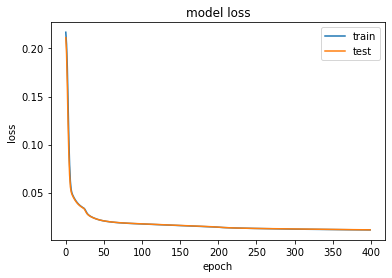

In [33]:
# Plot training loss and validation split loss over the epochs
#print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('sparseAE_model_loss.png')
plt.show()

In [34]:
evaluation = autoencoder.evaluate(x_test, x_test)

print("Loss:",evaluation)
data = autoencoder.predict(x_test)

1923/1923 [==============================] - 0s 18us/step
Loss: 0.01037334644047275


In [35]:
encoder = Model(input_data, encoded)
latent_vector_train = encoder.predict(x_train)
latent_vector = encoder.predict(x_test)

In [36]:
latent_vector.shape

(1923, 3)

In [37]:
latent_vector

array([[ 3.0777209 ,  6.1050205 ,  0.6540877 ],
       [10.004944  ,  7.3781815 ,  2.3247721 ],
       [ 2.4680781 ,  2.5916147 ,  9.3394785 ],
       ...,
       [ 0.936728  ,  2.3392286 , 10.591263  ],
       [ 4.369233  ,  9.239773  ,  1.1901255 ],
       [ 0.75821495,  2.1011047 ,  9.173143  ]], dtype=float32)

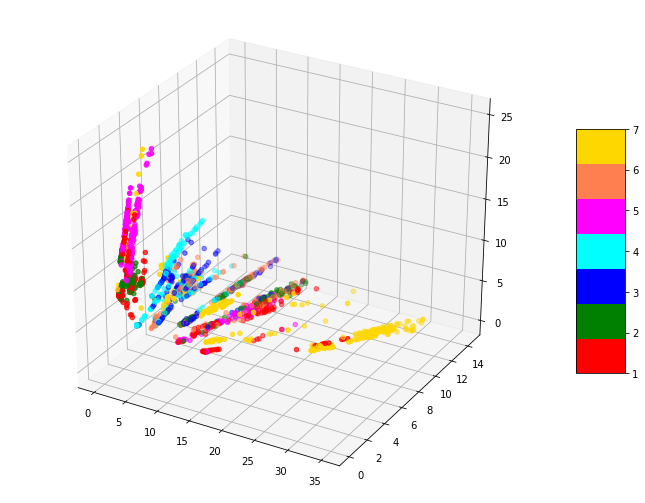

In [38]:
import matplotlib
%matplotlib inline
from mpl_toolkits import mplot3d
colors=['red','green','blue','cyan','magenta','coral','gold']
plt.figure(figsize =(12, 9))
ax = plt.axes(projection='3d')
surf = ax.scatter3D(latent_vector[:, 0], latent_vector[:, 1], latent_vector[:, 2], c=y_test, cmap=matplotlib.colors.ListedColormap(colors))
# Add a color bar which maps values to colors.
cb = plt.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('sparseAE_3d.png')
plt.show()

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knnscores = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(latent_vector_train, y_train)
    k = knn.score(latent_vector,y_test)
    knnscores.append(k)

s = np.array(knnscores)
result = np.where(s == s.max())
print('Knn Score : ',s.max(),'and k : ', result[0])

Knn Score :  0.7295891835673427 and k :  [0]


In [40]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(latent_vector)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Mean Absolute Error: 0.7436297451898076
Mean Squared Error: 2.419136765470619
Root Mean Squared Error: 1.555357439777307
[[198  20   0   0  43   7   1]
 [ 20 182  12   7  12  36   0]
 [  3  15 151  55   0  43   0]
 [  0  19  48 178   0  21   0]
 [ 38  11   0   0 231   5   1]
 [  7  38  62  19   2 146   0]
 [  4   1   0   0   2   0 285]]
              precision    recall  f1-score   support

           1       0.73      0.74      0.73       269
           2       0.64      0.68      0.66       269
           3       0.55      0.57      0.56       267
           4       0.69      0.67      0.68       266
           5       0.80      0.81      0.80       286
           6       0.57      0.53      0.55       274
           7       0.99      0.98      0.98       292

    accuracy                           0.71      1923
   macro avg       0.71      0.71      0.71      1923
weighted avg       0.71      0.71      0.71      1923

